<a href="https://colab.research.google.com/github/vidya100804/DEEP-LEARNING-EXPERIMENTS/blob/main/Exp_10_RNN_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense,Embedding
from tensorflow.keras.datasets import  imdb
from tensorflow.keras.models import Sequential


In [4]:
vocab_size = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
print(x_train[0])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
word_idx = imdb.get_word_index()

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
word_idx = {i: word for word, i in word_idx.items()}

In [7]:
print([word_idx[i] for i in x_train[0]])

['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'and', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', 'does', 'when', 'from', 'why', 'what', 'have', 'critics', 'they'

In [8]:
print("Max length of a review:: ", len(max((x_train+x_test), key=len)))
print("Min length of a review:: ", len(min((x_train+x_test), key=len)))

Max length of a review::  2697
Min length of a review::  70


In [9]:
from tensorflow.keras.preprocessing import sequence

In [10]:
max_words = 400
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

In [11]:
x_valid, y_valid = x_train[:64], y_train[:64]
x_train_, y_train_ = x_train[64:], y_train[64:]

In [13]:
embd_len = 32

RNN_model = Sequential(name="Simple_RNN")
RNN_model.add(Embedding(vocab_size,
embd_len,
input_length=max_words))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
RNN_model.add(SimpleRNN(128,
activation='tanh',
return_sequences=False))
RNN_model.add(Dense(1, activation='sigmoid'))

In [15]:
print(RNN_model.summary())
RNN_model.compile(
loss="binary_crossentropy",
optimizer='adam',
metrics=['accuracy']
)

Model: "Simple_RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [16]:
history = RNN_model.fit(x_train_, y_train_,batch_size=64,
epochs=5,
verbose=1,
validation_data=(x_valid, y_valid))

Epoch 1/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 80s 199ms/step - accuracy: 0.5541 - loss: 0.6815 - val_accuracy: 0.5938 - val_loss: 0.6653
Epoch 2/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 79s 201ms/step - accuracy: 0.6838 - loss: 0.5952 - val_accuracy: 0.7188 - val_loss: 0.6023
Epoch 3/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 79s 194ms/step - accuracy: 0.7800 - loss: 0.4802 - val_accuracy: 0.5625 - val_loss: 0.7065
Epoch 4/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 82s 193ms/step - accuracy: 0.7659 - loss: 0.4927 - val_accuracy: 0.6875 - val_loss: 0.7490
Epoch 5/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 82s 193ms/step - accuracy: 0.6918 - loss: 0.5878 - val_accuracy: 0.5938 - val_loss: 0.6941


In [18]:
import matplotlib.pyplot as plt

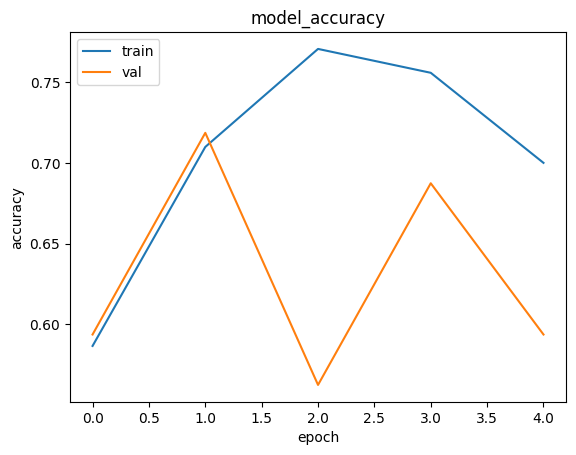

In [21]:
import matplotlib.pyplot as plt

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='upper left')
plt.show()